In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_squared_error

In [5]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

[28.03410144]
-3.539918078943183


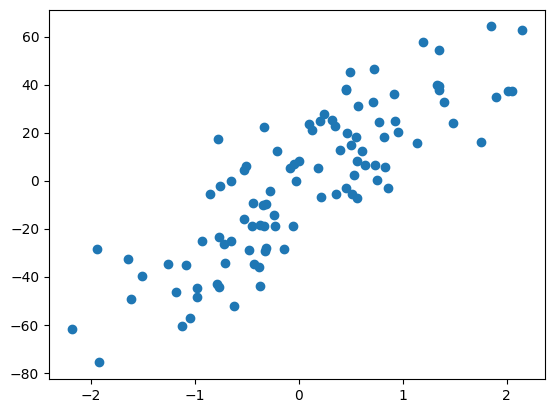

In [15]:
from sklearn.datasets import make_regression
X,y  = make_regression(n_samples = 100, n_features = 1, n_informative = 1, n_targets=1, noise = 20, random_state = 13)
plt.scatter(X,y)

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)
print(reg.coef_)
print(reg.intercept_)

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state= 23)

As the value of alpha increases the slope decreases and it will tend to zero

<ipython-input-17-5df26f205650>:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  L.fit(X_train,y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.113e+04, tolerance: 8.062e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


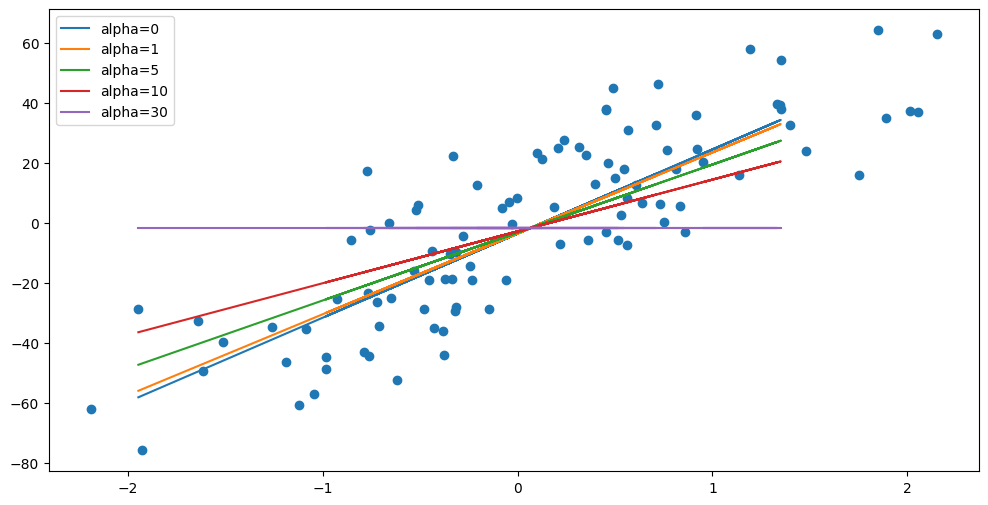

In [17]:
alphas = [0,1,5,10,30]
plt.figure(figsize=(12,6))
plt.scatter(X,y)
for i in alphas:
  L = Lasso(alpha = i)
  L.fit(X_train,y_train)
  plt.plot(X_test,L.predict(X_test),label ='alpha={}'.format(i))
plt.legend()
plt.show()

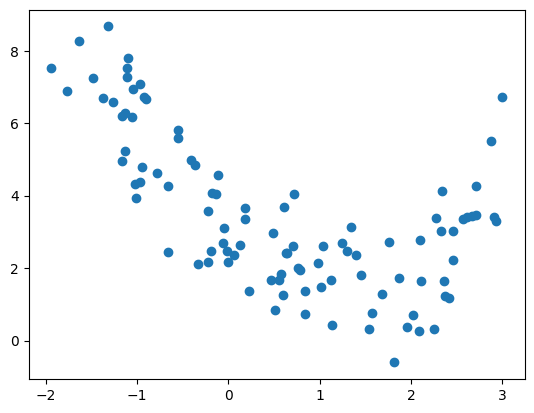

In [23]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.237e+01, tolerance: 4.534e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coor

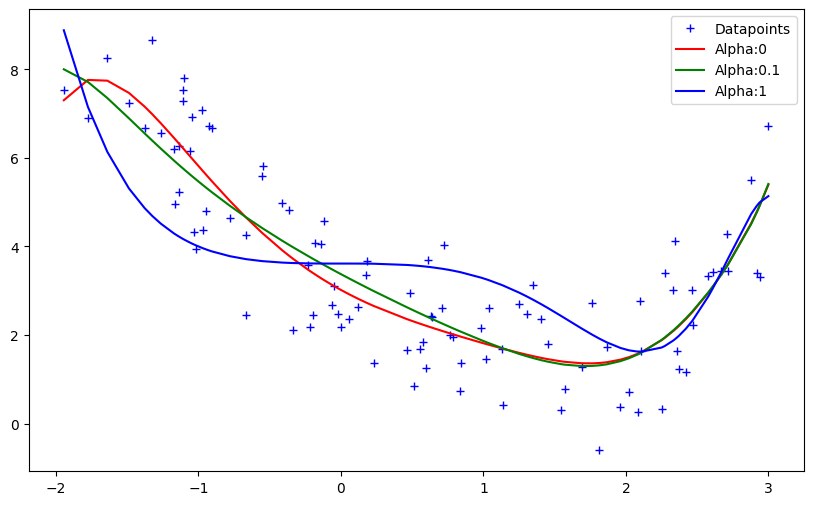

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso

def get_preds_lasso(x1,x2,alpha):
  model = Pipeline([
      ('poly_feats', PolynomialFeatures(degree =16)),
      ('lasso',Lasso(alpha = alpha))
  ])
  model.fit(x1,x2)
  return model.predict(x1)

alphas = [0,0.1,1]
cs = ['r','g','b']
plt.figure(figsize = (10,6))
plt.plot(x1,x2,'b+',label = 'Datapoints')

for alpha, c in zip(alphas, cs):
  preds = get_preds_lasso(x1,x2,alpha)
  plt.plot(sorted(x1[:,0]),preds[np.argsort(x1[:,0])],c,label = 'Alpha:{}'.format(alpha))
plt.legend()
plt.show()

With Lasso regression as we increase the alpha then we are setting those variable's coeff_ to zero which are not contributing that much so, basically it is inherently performing Feature Selection which in turns helps in Dimensionalty Reduction.

In [27]:
data = load_diabetes()
df = pd.DataFrame(data.data,columns = data.feature_names)
data['TARGET'] = data.target

In [28]:
X_train, X_test, y_train,y_test = train_test_split(data.data,data.target,test_size = 0.2,random_state = 2)

<ipython-input-35-766dfb8808af>:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  l.fit(X_train,y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Text(0.5, 1.0, 'Alpha = 10, r2_score = -0.01')

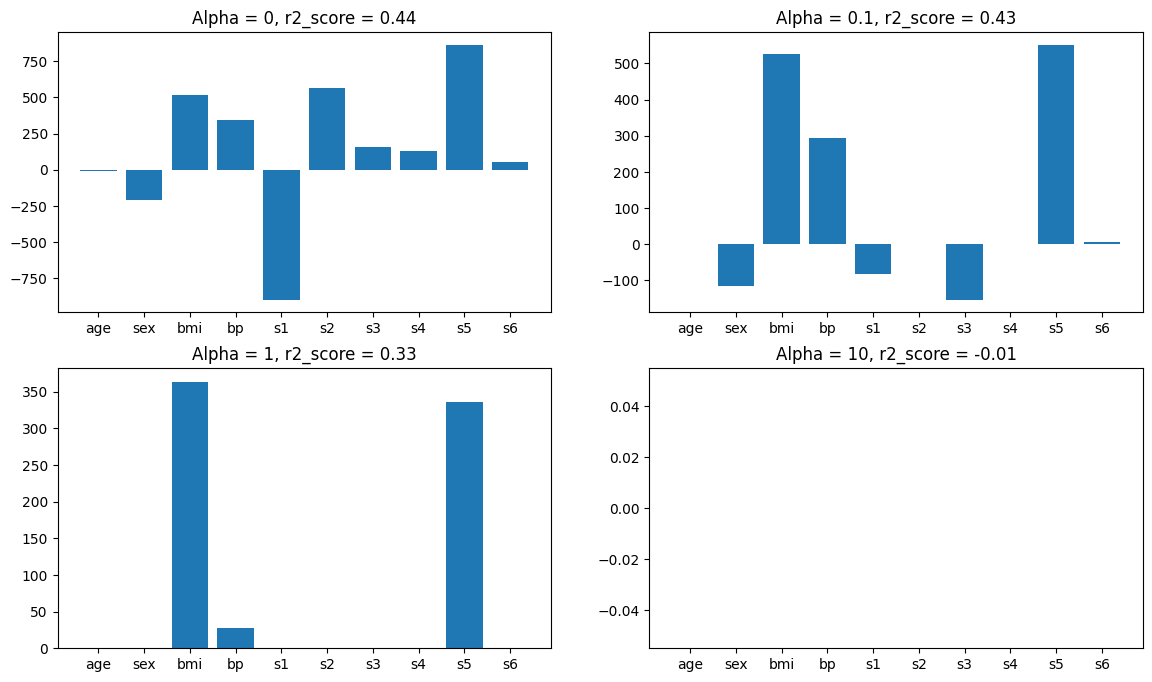

In [35]:
coefs = []
r2_scores = []
for i in [0,0.1,1,10]:
  l  = Lasso(alpha = i)
  l.fit(X_train,y_train)

  coefs.append(l.coef_.tolist())
  y_pred = l.predict(X_test)
  r2_scores.append(r2_score(y_test,y_pred))


plt.figure(figsize = (14,8))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('Alpha = 0, r2_score = {}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('Alpha = 0.1, r2_score = {}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('Alpha = 1, r2_score = {}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('Alpha = 10, r2_score = {}'.format(round(r2_scores[3],2)))

So we can observe that at alpha = 0.1 feature selection is happening and at alpha = 1 we have reduced the dimension to quite a greter extent but we also have to look r2_score as well beacuse here we are doing a trade off between alpha and r2_score

In [36]:
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
coefs = []
for i in alphas:
  reg = Lasso(alpha = i)
  reg.fit(X_train,y_train)

  coefs.append(reg.coef_.tolist())

<ipython-input-36-ee868977dc0e>:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  reg.fit(X_train,y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [37]:
in_arr = np.array(coefs)
coef_df = pd.DataFrame(in_arr, columns=data.feature_names)
coef_df['alpha'] = alphas
coef_df.set_index('alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,-9.158653,-205.454322,516.693745,340.619999,-895.551989,561.220669,153.893104,126.731395,861.126997,52.421122
0.0001,-9.069064,-205.329406,516.789418,340.532379,-888.660904,555.958584,150.593655,125.450143,858.645541,52.380294
0.0010,-8.262770,-204.205364,517.650073,339.743901,-826.663603,508.617395,120.908607,113.921773,836.320753,52.012849
0.0100,-1.359721,-192.937180,526.356514,332.641101,-430.226975,191.295480,-44.034913,68.988987,688.396028,47.940616
0.1000,0.000000,-113.969928,526.744396,292.628472,-82.693681,-0.000000,-152.685338,0.000000,551.080291,7.170992
1.0000,0.000000,0.000000,363.885742,27.273163,0.000000,0.000000,-0.000000,0.000000,336.137262,0.000000
10.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
100.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
1000.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


In [38]:
alphas = [0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]
coefs = []
for i in alphas:
  reg = Lasso(alpha = i)
  reg.fit(X_train,y_train)

  coefs.append(reg.coef_.tolist())

<ipython-input-38-3da908e56013>:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  reg.fit(X_train,y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.967e+05, tolerance: 2.124e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


So the main cause of overfitting is the higher values of the coeff_ so by increseing the alpha we are penalising the the variables with higher coeff_ more

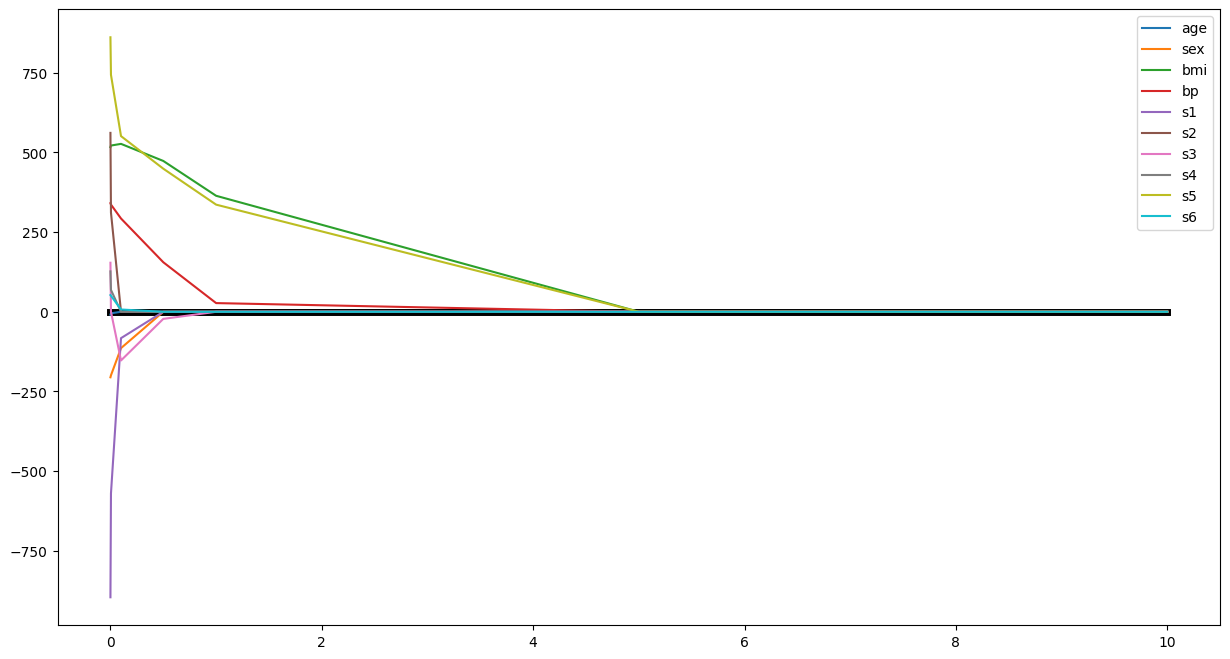

In [39]:
in_arr1 = np.array(coefs).T
plt.figure(figsize = (15,8))
plt.plot(alphas,np.zeros(len(alphas)),color = 'k',linewidth = 5)
for i in range(in_arr.shape[0]):
  plt.plot(alphas,in_arr1[i],label = data.feature_names[i])
plt.legend()

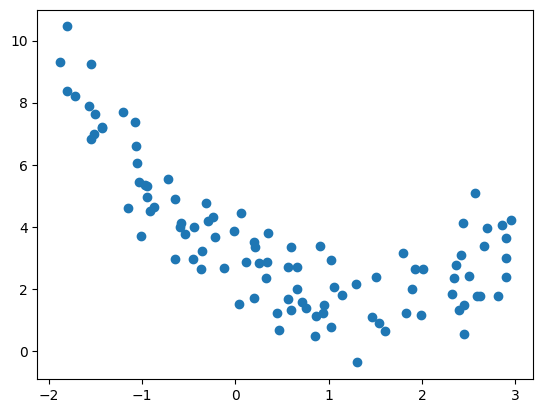

In [40]:
m = 100
X = 5*np.random.rand(m,1) - 2
y = 0.7* X **2 - 2*X+3 + np.random.randn(m,1)
plt.scatter(X,y)
plt.show()

In [41]:
X_train ,X_test, y_train,y_test = train_test_split(X.reshape(100,1),y.reshape(100),test_size = 0.2,random_state = 2)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 15)

X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)


In [42]:
from mlxtend.evaluate import bias_variance_decomp

alphas = np.linspace(0,30,100)

loss = []
bias =[]
variance = []
for i in alphas:
  reg = Lasso(alpha = i)
  avg_expected_loss,avg_bias,avg_variance = bias_variance_decomp(
      reg,X_train,y_train,X_test,y_test,loss = 'mse',random_seed = 123)
  loss.append(avg_expected_loss)
  variance.append(avg_variance)
  bias.append(avg_bias)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.368e+02, tolerance: 3.127e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.573e+02, tolerance: 4.002e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regula

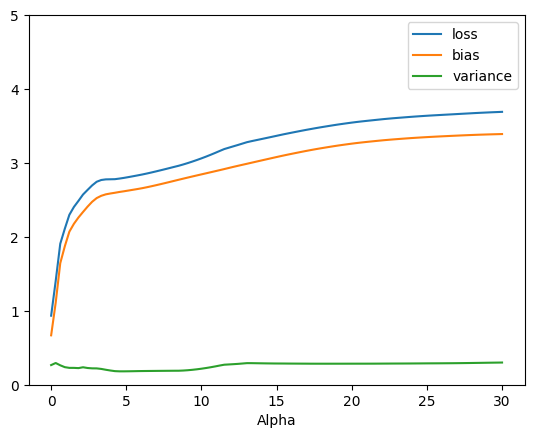

In [43]:
plt.plot(alphas,loss,label = 'loss')
plt.plot(alphas,bias,label = 'bias')
plt.plot(alphas,variance,label = 'variance')
plt.ylim(0,5)
plt.xlabel('Alpha')
plt.legend()

[27.82809103]
-2.29474455867698


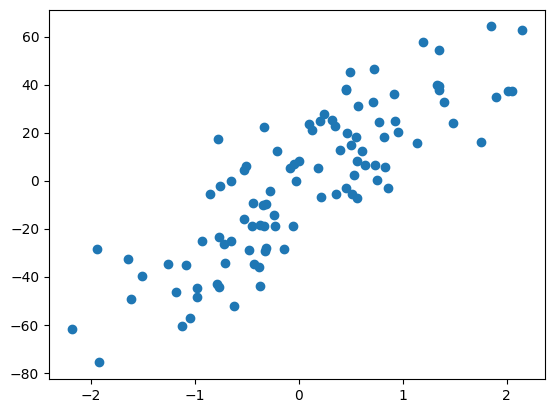

In [44]:
#EX,y  = make_regression(n_samples = 100, n_features = 1, n_informative = 1, n_targets=1, noise = 20, random_state = 13)
plt.scatter(X,y)
reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

## Effect of Regularization on Lasso Regression

So as alpha increases the slope decresese because the loss function is shifting towards zero and it won't go beyond zero it will stop there

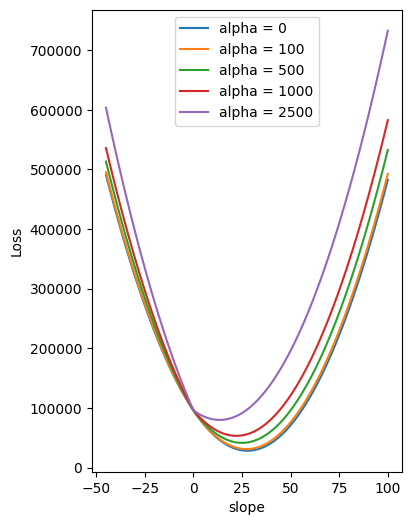

In [48]:
def cal_loss(m,alpha):
  return np.sum((y - m*X.ravel()+2.29)**2) + alpha*abs(m)
def predict(m):
  return m*X - 2.29

m = np.linspace(-45,100,100)
plt.figure(figsize = (4,6))
for j in [0,100,500,1000,2500]:
  loss = []
  for i in range(m.shape[0]):
    loss_i = cal_loss(m[i],j)
    loss.append(loss_i)
  plt.plot(m,loss,label = 'alpha = {}'.format(j))
plt.legend()
plt.xlabel('slope')
plt.ylabel('Loss')
plt.show()

So Lasso creates sparsity which means that if we increase the value of alpha then the value of some of the coeff_ boils down to zero.